In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Total License Count Data

In [5]:
df = pd.read_csv('license_counts.csv')
df.head()

,cc-by,cc-by-sa,cc-by-nd,cc-by-nc,cc-by-nc-sa,cc-by-nc-nd
0,12717,2614,552,6352,20320,4438


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

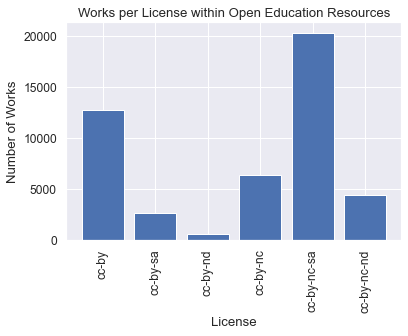

In [6]:
plt.bar(df.columns, df.iloc[0])
plt.title("Works per License within Open Education Resources")
plt.xlabel("License")
plt.ylabel("Number of Works")
plt.xticks(rotation=90)

# Licensed Works Data

In [7]:
oer_df = pd.read_csv("oer.csv", delimiter='\t')

In [8]:
oer_df = oer_df.rename(columns={"Education Level": "education_level", "Subject Area": "subject_area", "Material Type": "material_type", "Media Format": "media_format", "Primary User": "primary_user", "Educational Use": "educational_use"})

In [9]:
oer_df.head(20)

,id,license,modification_date,education_level,subject_area,material_type,media_format,Languages,primary_user,educational_use
0,86509,cc-by,2023-02-01,"middle-school,high-school",u-s-history,lesson-plan,"downloadable-docs,video",en,teacher,curriculum-instruction
1,88278,cc-by,2021-11-23,lower-primary,mathematics,activity-lab,NaN,en,NaN,NaN
2,73381,cc-by,2020-10-14,lower-primary,mathematics,interactive,NaN,en,NaN,NaN
3,6153,cc-by,2019-08-08,"upper-primary,high-school",mathematics,"activity-lab,lesson-plan,teaching-learning-str...",text-html,en,teacher,professional-development
4,8397,cc-by,2016-01-28,high-school,life-science,full-course,"downloadable-docs,text-html",en,"student,teacher",curriculum-instruction
5,62679,cc-by,2020-02-20,upper-primary,biology,lesson-plan,NaN,en,NaN,NaN
6,82859,cc-by,2021-06-27,high-school,visual-arts,lesson-plan,graphics-photos,tr,student,professional-development
7,56697,cc-by,2019-08-13,community-college-lower-division,biology,module,video,en,"student,teacher",curriculum-instruction
8,72848,cc-by,2020-10-26,high-school,education,lesson,NaN,en,NaN,NaN
9,56666,cc-by,2019-08-05,community-college-lower-division,life-science,module,video,en,"student,teacher",curriculum-instruction


In [21]:
oer_df['modification_date'] = oer_df['modification_date'].apply(pd.to_datetime)

In [22]:
# Expand columns
def get_unique_values(column):
    lst = oer_df[column].unique()
    set_items = set()
    for item in lst:
        split = str(item).split(",")
        for value in split:
            set_items.add(value)
    return set_items

def expand_columns(value):


IndentationError: expected an indented block (3875765411.py, line 11)

In [24]:
# TODO: explode columns?
oer_df.groupby('license')['subject_area'].agg(pd.Series.mode)

license
cc-by                    mathematics
cc-by-nc                   education
cc-by-nc-nd                education
cc-by-nc-sa     life-science,zoology
cc-by-nd          anatomy-physiology
cc-by-sa       environmental-science
Name: subject_area, dtype: object

In [60]:
oer_df

,id,license,modification_date,education_level,subject_area,material_type,media_format,Languages,primary_user,educational_use,primary_user_list
0,86509,cc-by,2023-02-01,"middle-school,high-school",u-s-history,lesson-plan,"downloadable-docs,video",en,teacher,curriculum-instruction,<class 'str'>
1,88278,cc-by,2021-11-23,lower-primary,mathematics,activity-lab,NaN,en,NaN,NaN,<class 'float'>
2,73381,cc-by,2020-10-14,lower-primary,mathematics,interactive,NaN,en,NaN,NaN,<class 'float'>
3,6153,cc-by,2019-08-08,"upper-primary,high-school",mathematics,"activity-lab,lesson-plan,teaching-learning-str...",text-html,en,teacher,professional-development,<class 'str'>
4,8397,cc-by,2016-01-28,high-school,life-science,full-course,"downloadable-docs,text-html",en,"student,teacher",curriculum-instruction,<class 'str'>
...,...,...,...,...,...,...,...,...,...,...,...
46947,10704,cc-by-nc-nd,2016-10-25,high-school,business-and-communication,lesson-plan,NaN,en,"student,teacher",NaN,<class 'str'>
46948,13068,cc-by-nc-nd,2017-06-17,college-upper-division,education,module,text-html,it,"student,teacher",curriculum-instruction,<class 'str'>
46949,23649,cc-by-nc-nd,2018-05-26,graduate-professional,health-medicine-and-nursing,module,ebook,en,"student,teacher",professional-development,<class 'str'>
46950,26621,cc-by-nc-nd,2018-01-14,NaN,physical-science,activity-lab,"graphics-photos,text-html",en,NaN,NaN,<class 'float'>


In [35]:
oer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46952 entries, 0 to 46951
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 46952 non-null  int64         
 1   license            46952 non-null  object        
 2   modification_date  46616 non-null  datetime64[ns]
 3   education_level    45967 non-null  object        
 4   subject_area       46545 non-null  object        
 5   material_type      46743 non-null  object        
 6   media_format       39080 non-null  object        
 7   Languages          45675 non-null  object        
 8   primary_user       33758 non-null  object        
 9   educational_use    26127 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 3.6+ MB


In [67]:
oer_df_byeducation = oer_df.dropna(subset=['education_level','material_type'])
oer_df_byeducation['education_level_explode'] = oer_df_byeducation['education_level'].apply(lambda x: x.split(','))
oer_df_byeducation1 = oer_df_byeducation.explode('education_level_explode')
oer_df_byeducation1

/var/folders/7t/sqs7llcx0gq32r5xtywmbqlm0000gn/T/ipykernel_13896/848963777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oer_df_byeducation['education_level_explode'] = oer_df_byeducation['education_level'].apply(lambda x: x.split(','))


,id,license,modification_date,education_level,subject_area,material_type,media_format,Languages,primary_user,educational_use,primary_user_list,education_level_explode
0,86509,cc-by,2023-02-01,"middle-school,high-school",u-s-history,lesson-plan,"downloadable-docs,video",en,teacher,curriculum-instruction,<class 'str'>,middle-school
0,86509,cc-by,2023-02-01,"middle-school,high-school",u-s-history,lesson-plan,"downloadable-docs,video",en,teacher,curriculum-instruction,<class 'str'>,high-school
1,88278,cc-by,2021-11-23,lower-primary,mathematics,activity-lab,NaN,en,NaN,NaN,<class 'float'>,lower-primary
2,73381,cc-by,2020-10-14,lower-primary,mathematics,interactive,NaN,en,NaN,NaN,<class 'float'>,lower-primary
3,6153,cc-by,2019-08-08,"upper-primary,high-school",mathematics,"activity-lab,lesson-plan,teaching-learning-str...",text-html,en,teacher,professional-development,<class 'str'>,upper-primary
...,...,...,...,...,...,...,...,...,...,...,...,...
46947,10704,cc-by-nc-nd,2016-10-25,high-school,business-and-communication,lesson-plan,NaN,en,"student,teacher",NaN,<class 'str'>,high-school
46948,13068,cc-by-nc-nd,2017-06-17,college-upper-division,education,module,text-html,it,"student,teacher",curriculum-instruction,<class 'str'>,college-upper-division
46949,23649,cc-by-nc-nd,2018-05-26,graduate-professional,health-medicine-and-nursing,module,ebook,en,"student,teacher",professional-development,<class 'str'>,graduate-professional
46951,46255,cc-by-nc-nd,2018-07-03,"graduate-professional,adult-education","applied-science,arts-and-humanities,life-scien...","diagram-illustration,full-course,game,interact...","text-html,video",en,student,"curriculum-instruction,professional-developmen...",<class 'str'>,graduate-professional


In [69]:
oer_df_byeducation1['material_type_explode'] = oer_df_byeducation1['material_type'].apply(lambda x: x.split(','))
oer_df_byeducation1 = oer_df_byeducation1.explode('material_type_explode')
oer_df_byeducation1

,id,license,modification_date,education_level,subject_area,material_type,media_format,Languages,primary_user,educational_use,primary_user_list,education_level_explode,material_type_explode
0,86509,cc-by,2023-02-01,"middle-school,high-school",u-s-history,lesson-plan,"downloadable-docs,video",en,teacher,curriculum-instruction,<class 'str'>,middle-school,lesson-plan
0,86509,cc-by,2023-02-01,"middle-school,high-school",u-s-history,lesson-plan,"downloadable-docs,video",en,teacher,curriculum-instruction,<class 'str'>,high-school,lesson-plan
1,88278,cc-by,2021-11-23,lower-primary,mathematics,activity-lab,NaN,en,NaN,NaN,<class 'float'>,lower-primary,activity-lab
2,73381,cc-by,2020-10-14,lower-primary,mathematics,interactive,NaN,en,NaN,NaN,<class 'float'>,lower-primary,interactive
3,6153,cc-by,2019-08-08,"upper-primary,high-school",mathematics,"activity-lab,lesson-plan,teaching-learning-str...",text-html,en,teacher,professional-development,<class 'str'>,upper-primary,activity-lab
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46951,46255,cc-by-nc-nd,2018-07-03,"graduate-professional,adult-education","applied-science,arts-and-humanities,life-scien...","diagram-illustration,full-course,game,interact...","text-html,video",en,student,"curriculum-instruction,professional-developmen...",<class 'str'>,adult-education,diagram-illustration
46951,46255,cc-by-nc-nd,2018-07-03,"graduate-professional,adult-education","applied-science,arts-and-humanities,life-scien...","diagram-illustration,full-course,game,interact...","text-html,video",en,student,"curriculum-instruction,professional-developmen...",<class 'str'>,adult-education,full-course
46951,46255,cc-by-nc-nd,2018-07-03,"graduate-professional,adult-education","applied-science,arts-and-humanities,life-scien...","diagram-illustration,full-course,game,interact...","text-html,video",en,student,"curriculum-instruction,professional-developmen...",<class 'str'>,adult-education,game
46951,46255,cc-by-nc-nd,2018-07-03,"graduate-professional,adult-education","applied-science,arts-and-humanities,life-scien...","diagram-illustration,full-course,game,interact...","text-html,video",en,student,"curriculum-instruction,professional-developmen...",<class 'str'>,adult-education,interactive


In [73]:
grouped = oer_df_byeducation1.groupby('education_level_explode')['material_type_explode']
grouped.describe()

,count,unique,top,freq
education_level_explode,,,,
adult-education,4066,22,lecture,490
career-technical,4169,22,reading,677
college-upper-division,17727,22,reading,3734
community-college-lower-division,25112,22,activity-lab,4212
graduate-professional,7147,22,reading,1171
high-school,21709,22,activity-lab,4468
lower-primary,6969,22,lesson-plan,1654
middle-school,12313,22,activity-lab,3118
preschool,1116,22,activity-lab,287


Text(0, 0.5, 'Frequency')

<Figure size 720x720 with 0 Axes>

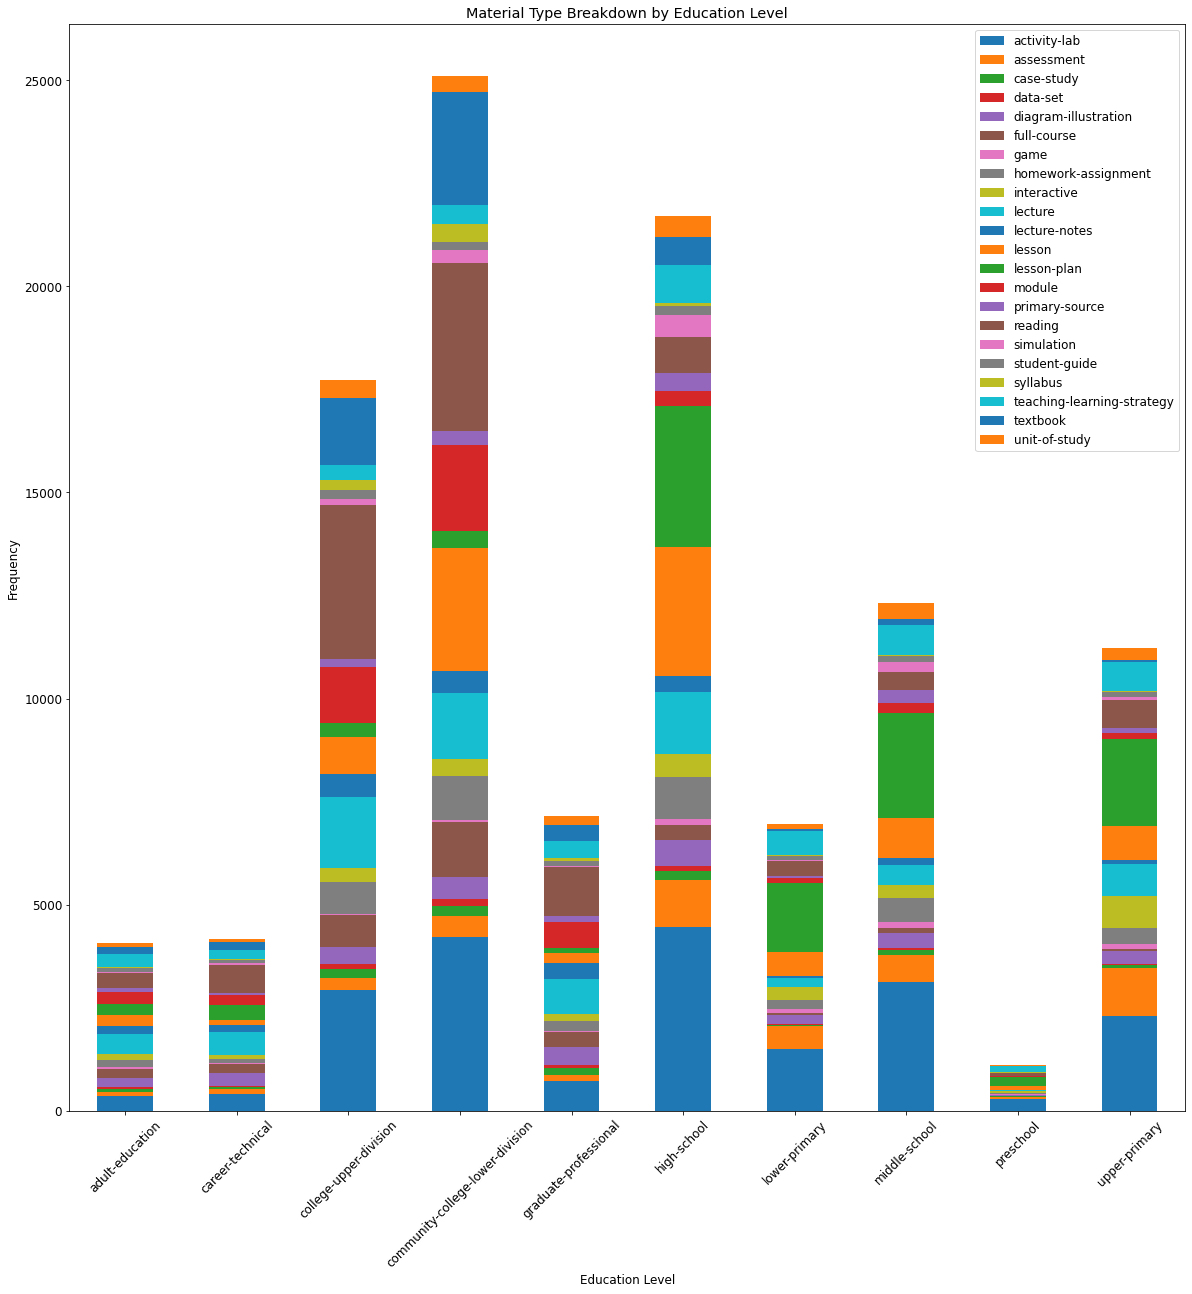

In [105]:
plt.figure(figsize=(10,10)) 
ax = oer_df_byeducation1.groupby(['education_level_explode', 'material_type_explode']).size().unstack().plot(kind='bar', stacked=True, title='Material Type Breakdown by Education Level')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.rcParams.update({'font.size': 15})
plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Frequency")

In [108]:
oer_df_byuser = oer_df.dropna(subset=['primary_user'])
oer_df_byuser['primary_user_explode'] = oer_df_byuser['primary_user'].apply(lambda x: x.split(','))
oer_df_byuser = oer_df_byuser.explode('primary_user_explode')
oer_df_byuser


/var/folders/7t/sqs7llcx0gq32r5xtywmbqlm0000gn/T/ipykernel_13896/2034685047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oer_df_byuser['primary_user_explode'] = oer_df_byuser['primary_user'].apply(lambda x: x.split(','))


,id,license,modification_date,education_level,subject_area,material_type,media_format,Languages,primary_user,educational_use,primary_user_list,primary_user_explode
0,86509,cc-by,2023-02-01,"middle-school,high-school",u-s-history,lesson-plan,"downloadable-docs,video",en,teacher,curriculum-instruction,<class 'str'>,teacher
3,6153,cc-by,2019-08-08,"upper-primary,high-school",mathematics,"activity-lab,lesson-plan,teaching-learning-str...",text-html,en,teacher,professional-development,<class 'str'>,teacher
4,8397,cc-by,2016-01-28,high-school,life-science,full-course,"downloadable-docs,text-html",en,"student,teacher",curriculum-instruction,<class 'str'>,student
4,8397,cc-by,2016-01-28,high-school,life-science,full-course,"downloadable-docs,text-html",en,"student,teacher",curriculum-instruction,<class 'str'>,teacher
6,82859,cc-by,2021-06-27,high-school,visual-arts,lesson-plan,graphics-photos,tr,student,professional-development,<class 'str'>,student
...,...,...,...,...,...,...,...,...,...,...,...,...
46948,13068,cc-by-nc-nd,2017-06-17,college-upper-division,education,module,text-html,it,"student,teacher",curriculum-instruction,<class 'str'>,student
46948,13068,cc-by-nc-nd,2017-06-17,college-upper-division,education,module,text-html,it,"student,teacher",curriculum-instruction,<class 'str'>,teacher
46949,23649,cc-by-nc-nd,2018-05-26,graduate-professional,health-medicine-and-nursing,module,ebook,en,"student,teacher",professional-development,<class 'str'>,student
46949,23649,cc-by-nc-nd,2018-05-26,graduate-professional,health-medicine-and-nursing,module,ebook,en,"student,teacher",professional-development,<class 'str'>,teacher


Text(0, 0.5, 'Number of Items')

<Figure size 720x1440 with 0 Axes>

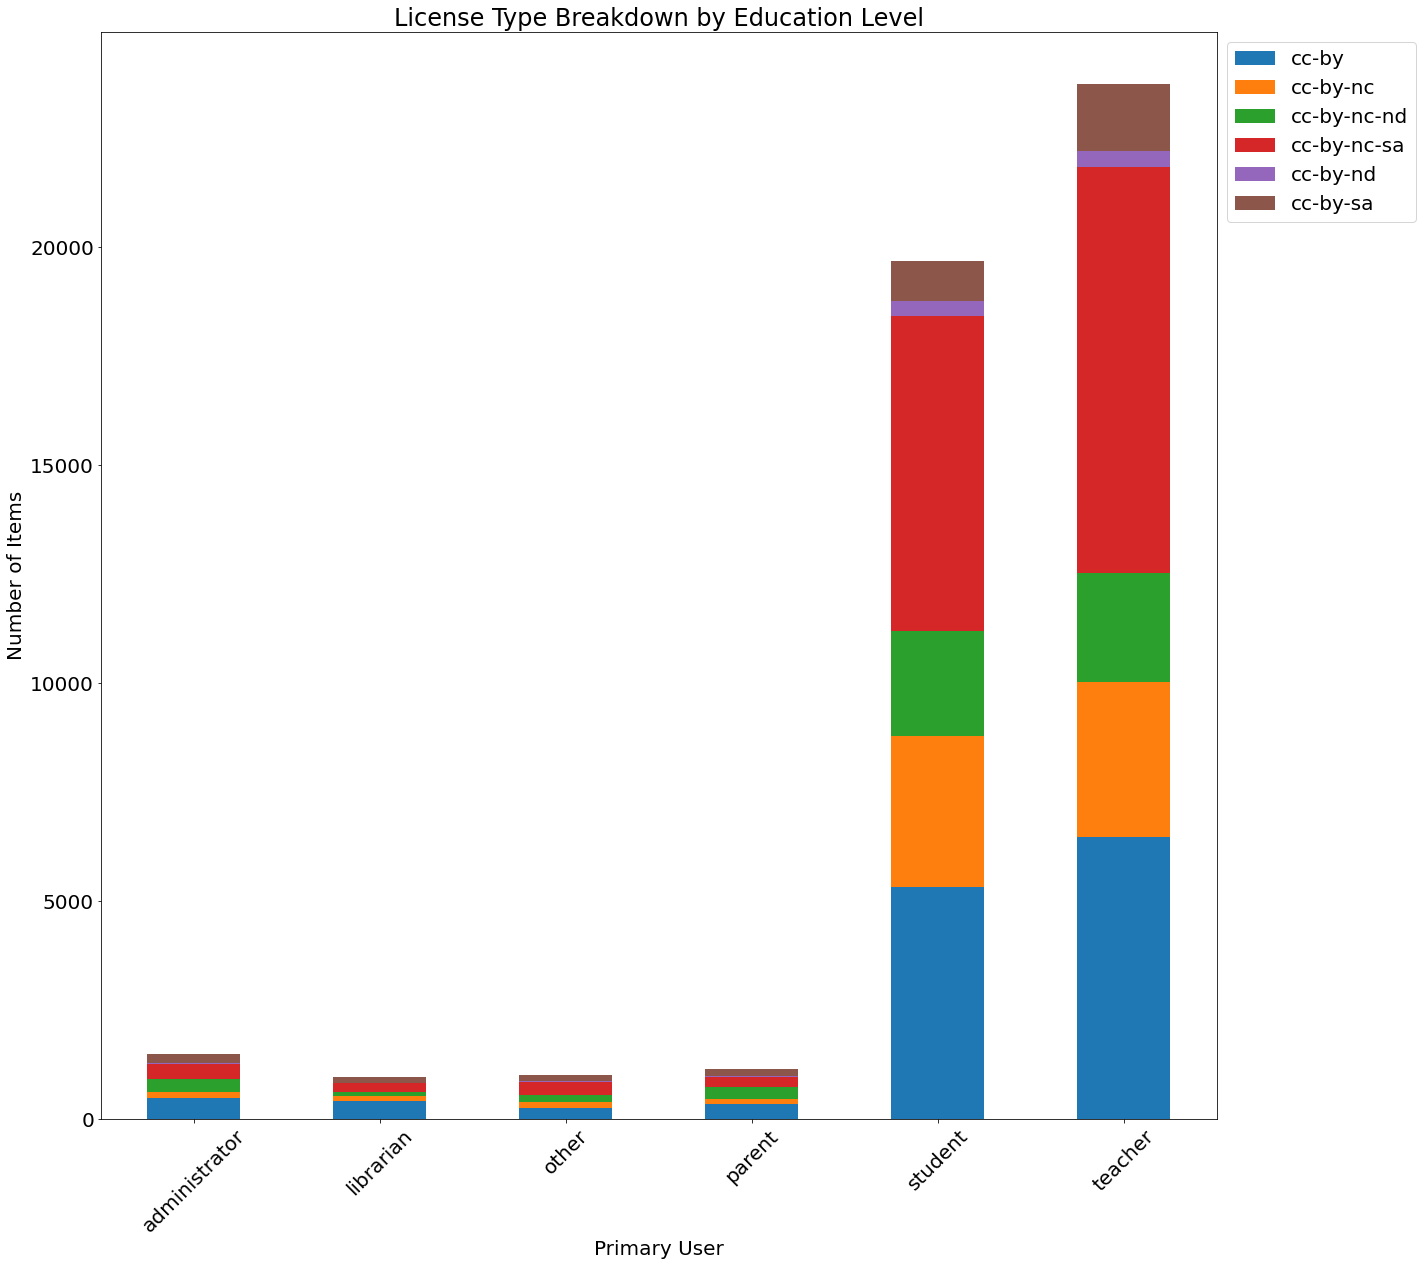

In [115]:
plt.figure(figsize=(10,20)) 
ax = oer_df_byuser.groupby(['primary_user_explode', 'license']).size().unstack().plot(kind='bar', stacked=True, title='License Type Breakdown by Education Level')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=45)
plt.xlabel("Primary User")
plt.ylabel("Number of Items")

In [117]:
oer_df

,id,license,modification_date,education_level,subject_area,material_type,media_format,Languages,primary_user,educational_use,primary_user_list
0,86509,cc-by,2023-02-01,"middle-school,high-school",u-s-history,lesson-plan,"downloadable-docs,video",en,teacher,curriculum-instruction,<class 'str'>
1,88278,cc-by,2021-11-23,lower-primary,mathematics,activity-lab,NaN,en,NaN,NaN,<class 'float'>
2,73381,cc-by,2020-10-14,lower-primary,mathematics,interactive,NaN,en,NaN,NaN,<class 'float'>
3,6153,cc-by,2019-08-08,"upper-primary,high-school",mathematics,"activity-lab,lesson-plan,teaching-learning-str...",text-html,en,teacher,professional-development,<class 'str'>
4,8397,cc-by,2016-01-28,high-school,life-science,full-course,"downloadable-docs,text-html",en,"student,teacher",curriculum-instruction,<class 'str'>
...,...,...,...,...,...,...,...,...,...,...,...
46947,10704,cc-by-nc-nd,2016-10-25,high-school,business-and-communication,lesson-plan,NaN,en,"student,teacher",NaN,<class 'str'>
46948,13068,cc-by-nc-nd,2017-06-17,college-upper-division,education,module,text-html,it,"student,teacher",curriculum-instruction,<class 'str'>
46949,23649,cc-by-nc-nd,2018-05-26,graduate-professional,health-medicine-and-nursing,module,ebook,en,"student,teacher",professional-development,<class 'str'>
46950,26621,cc-by-nc-nd,2018-01-14,NaN,physical-science,activity-lab,"graphics-photos,text-html",en,NaN,NaN,<class 'float'>


In [119]:
oef_df_bylanguage = oer_df.dropna(subset=['Languages'])
oef_df_bylanguage['languages_explode'] = oef_df_bylanguage['Languages'].apply(lambda x: x.split(','))
oef_df_bylanguage = oef_df_bylanguage.explode('languages_explode')
oef_df_bylanguage

/var/folders/7t/sqs7llcx0gq32r5xtywmbqlm0000gn/T/ipykernel_13896/4269199438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oef_df_bylanguage['languages_explode'] = oef_df_bylanguage['Languages'].apply(lambda x: x.split(','))


,id,license,modification_date,education_level,subject_area,material_type,media_format,Languages,primary_user,educational_use,primary_user_list,languages_explode
0,86509,cc-by,2023-02-01,"middle-school,high-school",u-s-history,lesson-plan,"downloadable-docs,video",en,teacher,curriculum-instruction,<class 'str'>,en
1,88278,cc-by,2021-11-23,lower-primary,mathematics,activity-lab,NaN,en,NaN,NaN,<class 'float'>,en
2,73381,cc-by,2020-10-14,lower-primary,mathematics,interactive,NaN,en,NaN,NaN,<class 'float'>,en
3,6153,cc-by,2019-08-08,"upper-primary,high-school",mathematics,"activity-lab,lesson-plan,teaching-learning-str...",text-html,en,teacher,professional-development,<class 'str'>,en
4,8397,cc-by,2016-01-28,high-school,life-science,full-course,"downloadable-docs,text-html",en,"student,teacher",curriculum-instruction,<class 'str'>,en
...,...,...,...,...,...,...,...,...,...,...,...,...
46947,10704,cc-by-nc-nd,2016-10-25,high-school,business-and-communication,lesson-plan,NaN,en,"student,teacher",NaN,<class 'str'>,en
46948,13068,cc-by-nc-nd,2017-06-17,college-upper-division,education,module,text-html,it,"student,teacher",curriculum-instruction,<class 'str'>,it
46949,23649,cc-by-nc-nd,2018-05-26,graduate-professional,health-medicine-and-nursing,module,ebook,en,"student,teacher",professional-development,<class 'str'>,en
46950,26621,cc-by-nc-nd,2018-01-14,NaN,physical-science,activity-lab,"graphics-photos,text-html",en,NaN,NaN,<class 'float'>,en


In [129]:
vc = oef_df_bylanguage['languages_explode'].value_counts()
vc[vc > 10].head(5)

en    43092
es     1276
fr      908
de      506
ar      498
Name: languages_explode, dtype: int64

In [131]:
oer_en = oef_df_bylanguage[oef_df_bylanguage['languages_explode'] == 'en']
oer_en

,id,license,modification_date,education_level,subject_area,material_type,media_format,Languages,primary_user,educational_use,primary_user_list,languages_explode
0,86509,cc-by,2023-02-01,"middle-school,high-school",u-s-history,lesson-plan,"downloadable-docs,video",en,teacher,curriculum-instruction,<class 'str'>,en
1,88278,cc-by,2021-11-23,lower-primary,mathematics,activity-lab,NaN,en,NaN,NaN,<class 'float'>,en
2,73381,cc-by,2020-10-14,lower-primary,mathematics,interactive,NaN,en,NaN,NaN,<class 'float'>,en
3,6153,cc-by,2019-08-08,"upper-primary,high-school",mathematics,"activity-lab,lesson-plan,teaching-learning-str...",text-html,en,teacher,professional-development,<class 'str'>,en
4,8397,cc-by,2016-01-28,high-school,life-science,full-course,"downloadable-docs,text-html",en,"student,teacher",curriculum-instruction,<class 'str'>,en
...,...,...,...,...,...,...,...,...,...,...,...,...
46945,269061,cc-by-nc-nd,2023-03-17,college-upper-division,"mathematics,social-science",reading,NaN,en,NaN,NaN,<class 'float'>,en
46947,10704,cc-by-nc-nd,2016-10-25,high-school,business-and-communication,lesson-plan,NaN,en,"student,teacher",NaN,<class 'str'>,en
46949,23649,cc-by-nc-nd,2018-05-26,graduate-professional,health-medicine-and-nursing,module,ebook,en,"student,teacher",professional-development,<class 'str'>,en
46950,26621,cc-by-nc-nd,2018-01-14,NaN,physical-science,activity-lab,"graphics-photos,text-html",en,NaN,NaN,<class 'float'>,en


In [3]:
#Create pie chart visualization - showing the percentage of items that are attached to each CC license type
sns.set_theme(font="arial", font_scale=1.1)
plt.figure(figsize=(5,5)) 
plt.rcParams.update({'font.size': 15})
plt.pie(oer_en['license'].value_counts(), labels = oer_en['license'].unique(), 
        colors = sns.color_palette('pastel')[0:6], autopct='%.0f%%')
plt.rcParams.update({'font.size': 12})
plt.title('Percentage of Items in English per License Type')
plt.show()


NameError: name 'oer_en' is not defined

<Figure size 360x360 with 0 Axes>

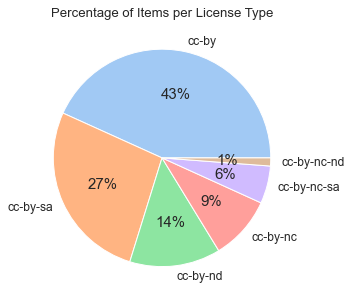

In [10]:
sns.set_theme(font="arial", font_scale=1.1)
plt.figure(figsize=(5,5)) 
plt.rcParams.update({'font.size': 15})
plt.pie(oer_df['license'].value_counts(), labels = oer_df['license'].unique(), 
        colors = sns.color_palette('pastel')[0:6], autopct='%.0f%%')
plt.rcParams.update({'font.size': 12})
plt.title('Percentage of Items per License Type')
plt.show()